In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt


data_dir = r'/content/drive/MyDrive/Colab Notebooks/Tugas6_A_11775/train_data'
data = tf.keras.utils.image_dataset_from_directory(data_dir, seed=123, image_size=(180, 180), batch_size=16)
print(data.class_names)

class_names = data.class_names

Found 1600 files belonging to 2 classes.
['Matang', 'Mentah']


In [9]:
img_size = 180
batch = 32
validation_split = 0.1

dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch,
)

Found 1600 files belonging to 2 classes.


In [10]:
total_count = len(dataset)
val_count = int(total_count * validation_split)
train_count = total_count - val_count

print("Total Images:", total_count)
print("Train Images:", train_count)
print("Validation Images:", val_count)

train_ds = dataset.take(train_count)
val_ds = dataset.skip(train_count)

Total Images: 50
Train Images: 45
Validation Images: 5


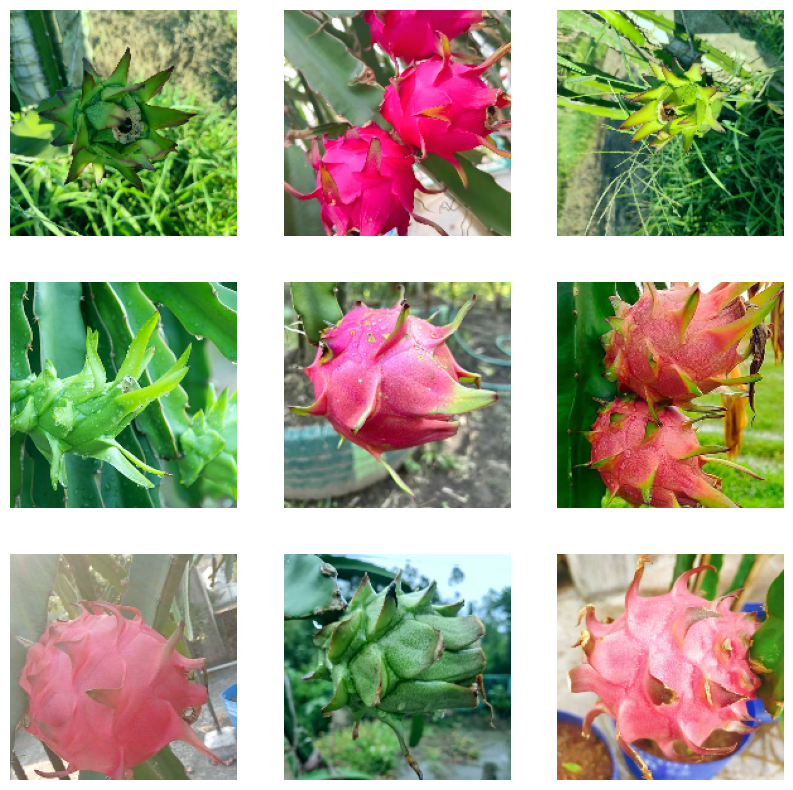

In [11]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10))

#tampilkan untuk memastikan data sudah di load
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')

###Terdapat code yang hilang disini! lihat modul untuk menemukanya
###Pastikan nama kelas berhasil untuk ditampilkan

In [ ]:
for images, labels in train_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape)

#loop untuk mengecek atribut gambar(jumlah, tinggi, lebar, dan channel(RGB))

(32, 180, 180, 3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


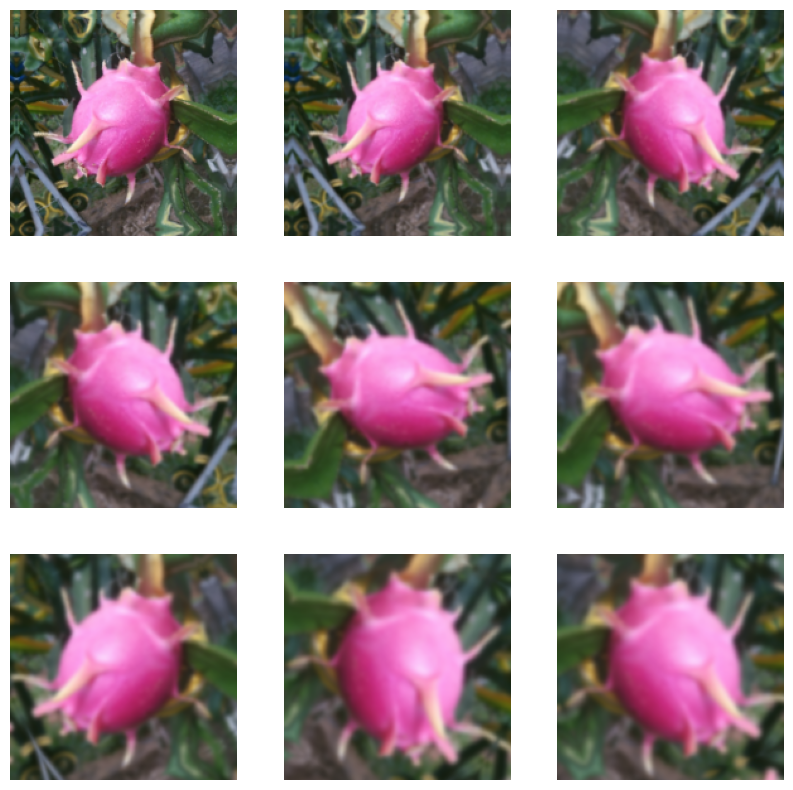

In [12]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

Tuner = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=Tuner)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=Tuner)

data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

i = 0
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(69):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')


In [13]:
import tensorflow as tf
import keras

import keras._tf_keras.keras.backend as K
from keras._tf_keras.keras.models import Model
from keras._tf_keras.keras.layers import Input, Dense, Conv2D
from keras._tf_keras.keras.layers import Flatten, MaxPool2D, AvgPool2D
from keras._tf_keras.keras.layers import Concatenate, Dropout

from keras._tf_keras.keras.models import load_model

#membuat model from scratch
def googlenet(input_shape, n_classes):

    def inception_block(x, f):
        t1 = Conv2D(f[0], 1, activation='relu')(x)

        t2 = Conv2D(f[1], 1, activation='relu')(x)
        t2 = Conv2D(f[2], 3, padding='same', activation='relu')(t2)

        t3 = Conv2D(f[3], 1, activation='relu')(x)
        t3 = Conv2D(f[4], 5, padding='same', activation='relu')(t3)

        t4 = MaxPool2D(3, 1, padding='same')(x)
        t4 = Conv2D(f[5], 1, activation='relu')(t4)

        output = Concatenate()([t1, t2, t3, t4])
        return output


    input = Input(input_shape)

    x = Conv2D(64, 7, strides=2, padding='same', activation='relu')(input)
    x = MaxPool2D(3, strides=2, padding='same')(x)

    x = Conv2D(64, 1, activation='relu')(x)
    x = Conv2D(192, 3, padding='same', activation='relu')(x)
    x = MaxPool2D(3, strides=2)(x)

    x = inception_block(x, [64, 96, 128, 16, 32, 32])
    x = inception_block(x, [128, 128, 192, 32, 96, 64])
    x = MaxPool2D(3, strides=2, padding='same')(x)

    x = inception_block(x, [192, 96, 208, 16, 48, 64])
    x = inception_block(x, [160, 112, 224, 24, 64, 64])
    x = inception_block(x, [128, 128, 256, 24, 64, 64])
    x = inception_block(x, [112, 144, 288, 32, 64, 64])
    x = inception_block(x, [256, 160, 320, 32, 128, 128])
    x = MaxPool2D(3, strides=2, padding='same')(x)

    x = inception_block(x, [256, 160, 320, 32, 128, 128])
    x = inception_block(x, [384, 192, 384, 48, 128, 128])

    x = AvgPool2D(3, strides=1)(x)
    x = Dropout(0.4)(x)

    x = Flatten()(x)
    output = Dense(n_classes, activation='softmax')(x)

    model = Model(input, output)
    return model
#Pastikan input shae dan jumlah kelas sesuai
input_shape = 180, 180, 3
n_classes = 2

#Clear Cache Keras menggunakan clear session
K.clear_session()
#buat model dengan
model = googlenet(input_shape, n_classes)
model.summary()
###Terdapat code yang hilang disini! lihat modul untuk menemukanya

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 180, 180, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 90, 90, 64)     │          9,472 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 45, 45, 64)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 45, 45, 64)     │          4,160 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 45, 45, 192)    │        110,784 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 22, 22, 192)    │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 22, 22, 96)     │         18,528 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 22, 22, 16)     │          3,088 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 22, 22, 192)    │              0 │ max_pooling2d_1[0][0]  │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 22, 22, 64)     │         12,352 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 22, 22, 128)    │        110,720 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 22, 22, 32)     │         12,832 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 22, 22, 32)     │          6,176 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 22, 22, 256)    │              0 │ conv2d_3[0][0],        │
│                           │                        │                │ conv2d_5[0][0],        │
│                           │                        │                │ conv2d_7[0][0],        │
│                           │                        │                │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 22, 22, 128)    │         32,896 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 22, 22, 32)     │          8,224 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3      

 Total params: 6,006,322 (22.91 MB)

 Trainable params: 6,006,322 (22.91 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#Coimpile dengan optimizer adam
###Terdapat code yang hilang disini! lihat modul untuk menemukanya

#buat early stopping
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=5,
                               mode='max')
#fit validation data ke dalam model
history= model.fit(train_ds,
                   epochs=30,
                   validation_data=val_ds,
                   callbacks=[early_stopping])

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 340s 7s/step - accuracy: 0.5686 - loss: 1.3690 - val_accuracy: 0.4625 - val_loss: 0.7309
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 276s 6s/step - accuracy: 0.6496 - loss: 0.7229 - val_accuracy: 0.9375 - val_loss: 0.5332
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 316s 6s/step - accuracy: 0.9832 - loss: 0.1783 - val_accuracy: 0.9937 - val_loss: 0.0412
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 322s 6s/step - accuracy: 0.9989 - loss: 0.0135 - val_accuracy: 0.9937 - val_loss: 0.0369
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 267s 6s/step - accuracy: 0.9981 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 8.9924e-04
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 269s 6s/step - accuracy: 0.9969 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 3.7858e-04
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 321s 6s/step - accuracy: 1.0000 - loss: 2.4125e-04 - val_accuracy: 1.0000 - val_loss: 1.0564e-06
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 267s 6s/step - accuracy: 0.9974 - loss: 0.0121 - val_accu

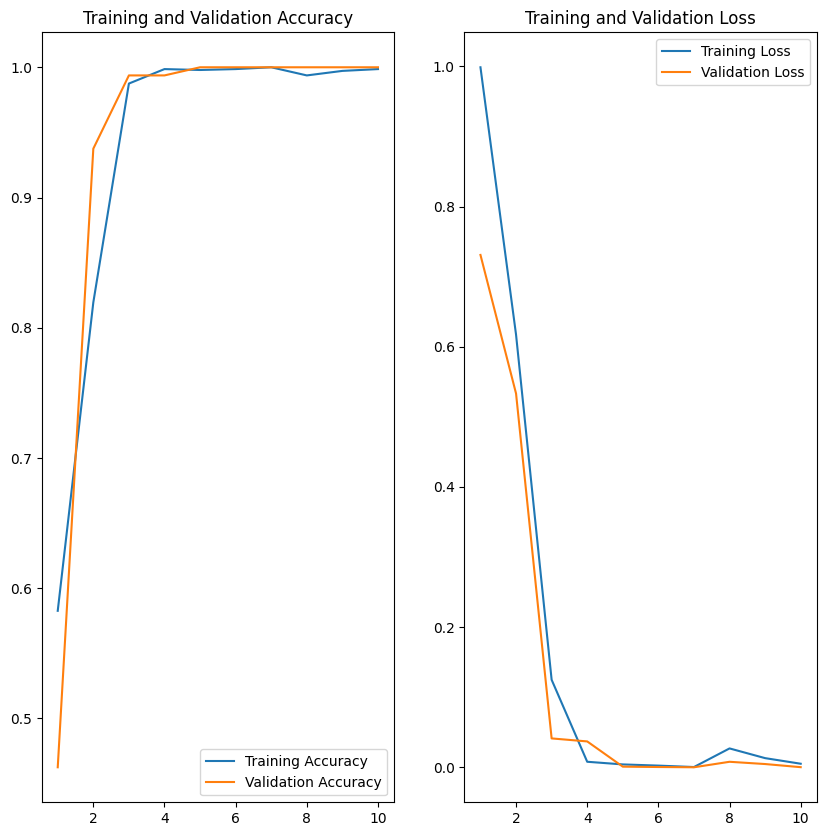

In [16]:
#buat plot dengan menggunakan history supaya jumlahnya sesuai epoch yang dilakukan
ephocs_range = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(ephocs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(ephocs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(ephocs_range, history.history['loss'], label='Training Loss')
plt.plot(ephocs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
model.save('gugelnet.keras')

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

# Load the trained model
model = load_model(r'/content/drive/MyDrive/Colab Notebooks/Tugas6_A_11775/gugelnet.keras')  # Ganti dengan path model Anda
class_names = ['Matang', 'Mentah']

# Function to classify images and save the original image
def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        # Load and preprocess the image
        input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
        input_image_array = tf.keras.utils.img_to_array(input_image)
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)  # Add batch dimension

        # Predict
        predictions = model.predict(input_image_exp_dim)
        result = tf.nn.softmax(predictions[0])
        class_idx = np.argmax(result)
        confidence = np.max(result) * 100

        # Display prediction and confidence in notebook
        print(f"Prediksi: {class_names[class_idx]}")
        print(f"Confidence: {confidence:.2f}%")

        # Save the original image (without text)
        input_image = Image.open(image_path)
        input_image.save(save_path)

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"

# Contoh penggunaan fungsi
###Terdapat code yang hilang disini! lihat modul untuk menemukanya


Found 80 files belonging to 2 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step


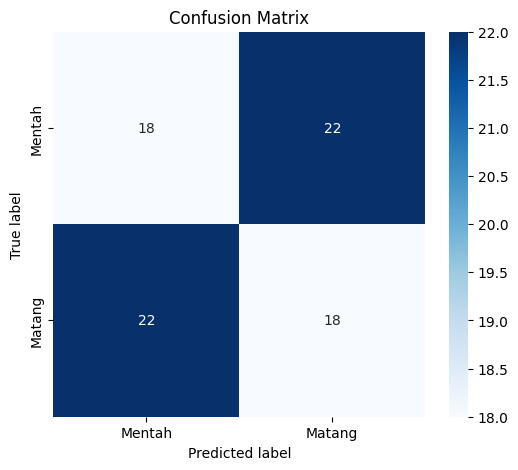

Confusion Matrix: [[18 22]
 [22 18]]

Akurasi: 0.45

Presisi: [0.45 0.45]

Recall: [0.45 0.45]

F1 Score: [0.45 0.45]


In [23]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

# Muat data test yang sebenarnya
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'/content/drive/MyDrive/Colab Notebooks/Tugas6_A_11775/test_data',
    labels='inferred',
    label_mode='categorical',  # Menghasilkan label dalam bentuk one-hot encoding
    batch_size=32,
    image_size=(180, 180)
)

# Prediksi model
y_pred = model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)  # Konversi ke kelas prediksi

# Ekstrak label sebenarnya dari test_data dan konversi ke bentuk indeks kelas
true_labels = []
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())  # Konversi one-hot ke indeks kelas
true_labels = tf.convert_to_tensor(true_labels)

# Membuat matriks kebingungan
###Terdapat code yang hilang disini! lihat modul untuk menemukanya
conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)
# Menghitung akurasi
accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

# Menghitung presisi dan recall
precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)

# Menghitung F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Mentah", "Matang"], yticklabels=["Mentah", "Matang"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Menampilkan hasil
###Terdapat code yang hilang disini! lihat modul untuk menemukanya
print("Confusion Matrix:", conf_mat.numpy())
print("\nAkurasi:", accuracy.numpy())
print("\nPresisi:", precision.numpy())
print("\nRecall:", recall.numpy())
print("\nF1 Score:", f1_score.numpy())
